In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('../datasets/4-Algerian_forest_fires_dataset.csv')

### EDA - Feature Extraction

In [122]:
df.head() # prediction -> FWI

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [123]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [125]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [126]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool

In [127]:
df.isnull().any(axis=1).sum()  # Total number of rows with null values: 3 

np.int64(3)

In [128]:
df[df.isnull().any(axis=1)] # check for rows with any null values 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


* df.isnull() -> True/False
* df.isnull().any(axis=1) -> Any True value?
* True -> null

In [129]:
df.shape

(247, 14)

In [130]:
df.drop(122, inplace=True)

In [131]:
df.shape

(246, 14)

### Adding a new column with encoding

In [132]:
df.loc[:123, "Region"] = 0
df.loc[123:, "Region"] = 1

In [133]:
df.head() # region: 0

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [134]:
df.tail() # region: 1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [135]:
df = df.dropna().reset_index(drop=True)


In [136]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [137]:
df.shape

(244, 15)

In [138]:
df.iloc[121]

day                     30
month                    9
year                  2012
Temperature             25
 RH                     78
 Ws                     14
Rain                   1.4
FFMC                    45
DMC                    1.9
DC                     7.5
ISI                    0.2
BUI                    2.4
FWI                    0.1
Classes        not fire   
Region                 0.0
Name: 121, dtype: object

In [139]:
df.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                 1.0
Name: 122, dtype: object

In [140]:
df.columns = df.columns.str.strip()

In [141]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [142]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [143]:
(df["day"] == "day").sum()

np.int64(1)

In [144]:
df[df["day"] == "day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [145]:
df.drop(122, inplace=True)

In [146]:
df[["day", "month", "year", "Temperature", "RH", "Ws"]] = df[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.4+ KB


In [148]:
df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI","FWI"]] = df[["Rain", "FFMC", "DMC", "DC", "ISI", "BUI","FWI"]].astype(float)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [150]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [151]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [152]:
df["Classes"] = df["Classes"].str.strip()

In [153]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [154]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

### Encoding Classes 
`np.where()` (Numpy'nin where metodu), temel olarak bir if-else koşulunu array veya series üzerinde uygulamak için kullanılır.

* Not: "fire",1,0 dediğimizde "not fire" içerisinde de fire geçtiği için tüm değerleri 1 yapıyor bu yüzden "not fire" üzerinden gittik

In [155]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [156]:
df[df["Classes"] == 1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0.0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0.0
10,11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1,0.0
11,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,19,9,2012,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1.0
234,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,1,1.0
235,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,1,1.0
236,23,9,2012,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,1,1.0


In [157]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [ ]:
df['Classes'].value_counts(normalize=True) # Proportion of each class

Classes
1    0.563786
0    0.436214
Name: proportion, dtype: float64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 30.4 KB


In [160]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


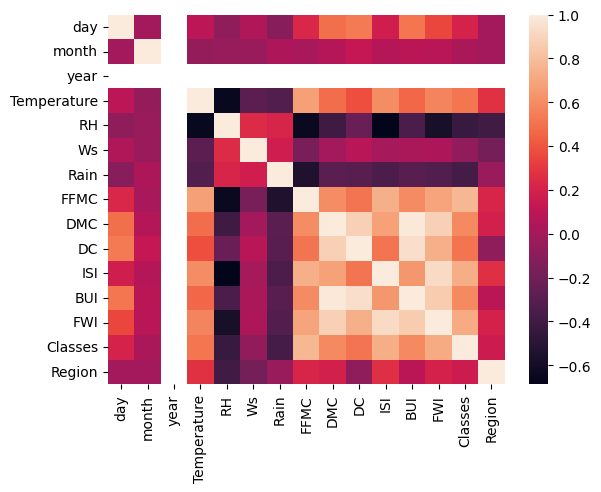

In [ ]:
sns.heatmap(df.corr())
plt.show()

# FWI Feature Correlation: Rain, RH, Ws, day, month -> Low Correlation

In [162]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [163]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


### Model

Dependent & Independent Features

In [ ]:
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [168]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [169]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

## Redundancy - Multicollinearity 
`Redundancy`: birden fazla özelliğin (kolonun) temelde aynı veya çok benzer bilgiyi taşıması durumudur.
* Örneğin bir veri setinde hem yaş hem de doğum yılı kolonu varsa, bu iki kolon birbirinin aynısıdır.
*  iki farklı kolon birbiriyle çok bağımlı olduğunda (örneğin, biri diğerinin matematiksel bir dönüşümü veya çok güçlü bir korelasyona sahipse), modelin öğrenmesi gereken bilgi aynı olur. Bu durum, model için fazladan bir yük ve karmaşıklık (complexity) yaratır.

`Multicollinearity`: Redundancy durumuna, özellikle regresyon modellerinde, Multicollinearity (Çoklu Doğrusallık) denir.
* Multicollinearity, bir regresyon modelindeki bağımsız değişkenlerin (X kolonları) birbirleriyle yüksek derecede ilişkili veya bağımlı olması durumudur.
* Redundancy, daha genel bir terimdir ve verideki tekrar eden bilgiyi ifade eder.
* Multicollinearity ise bu tekrar eden bilginin doğrusal bir ilişki içinde olmasını tanımlar ve özellikle regresyon analizinde kullanılır.

- Çözüm: En yaygın çözüm, birbirine çok bağımlı değişkenlerden birini modelden çıkarmaktır. Diğer bir yöntem ise, değişkenleri birleştirerek yeni bir özellik oluşturmaktır (örn: PCA).

`✨Yani korelasyonu çok yüksek iki değişkenin aynı anda girdi olarak kullanılması mantıklı değil`
* Genellikle %85-90 ve üzeri korelasyonlar için




In [174]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [177]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [176]:
print(X_train.corr().columns)

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')


In [180]:
print(X_train.corr().iloc[0,1])
print(X_train.corr().iloc[0,2])
print(X_train.corr().iloc[0,3])

-0.6448237350894374
-0.32240526904978994
-0.22280885320267385


#### `correlation_for_dropping` This function automates the process of finding such redundant columns based on a correlation

In [ ]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop 

* `set()` An empty set is created to store the names of the columns we decide to drop. A set is used because it automatically prevents duplicates; a column will only be added once, even if it's highly correlated with multiple other columns.
* `corr = df.corr()`: This line is the core of the analysis. The .corr() method from the pandas library calculates the pairwise correlation between all numeric columns in your DataFrame df.
* `for i in range(len(corr.columns))`, `for j in range(i)`: These nested loops iterate through the correlation matrix.The outer loop iterates through the columns by index i. The inner loop iterates through the columns by index j.
* `if abs(corr.iloc[i, j]) > threshold`: decision-making step
* `columns_to_drop.add(corr.columns[i])`: If the correlation is too high, the name of the column from the outer loop (corr.columns[i]) is added to our set of columns to drop. 

In [182]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [183]:
columns_dropping

{'BUI', 'DC'}

In [184]:
X_train.drop(columns_dropping, axis= 1, inplace = True)
X_test.drop(columns_dropping, axis= 1, inplace = True)

In [185]:
X_train.shape

(182, 9)

In [186]:
X_test.shape

(61, 9)

### Scaling

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [191]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: title={'center': 'After Scaling'}>

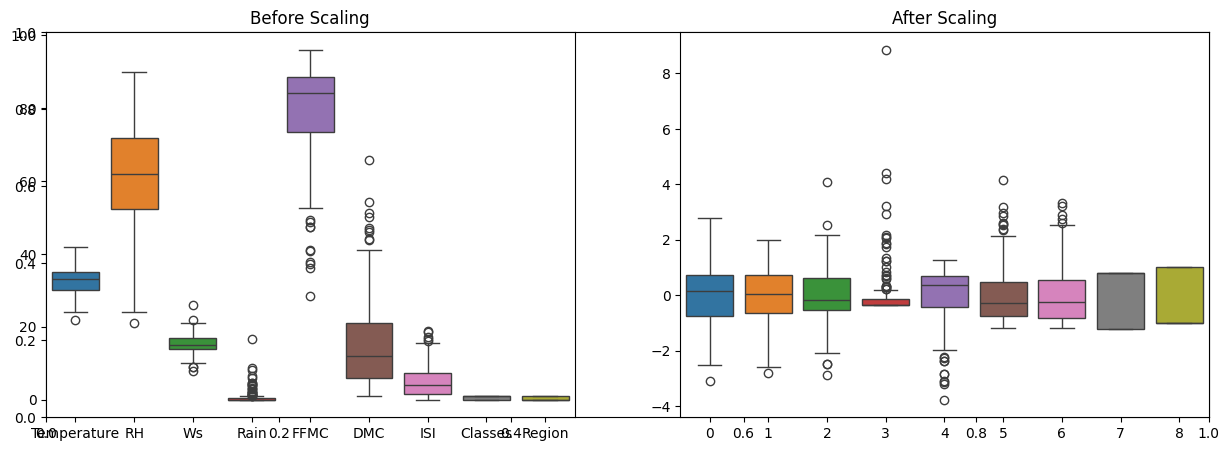

In [194]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Before Scaling")
sns.boxplot(data=X_train)
plt.subplot(1, 2, 2)
plt.title("After Scaling")
sns.boxplot(data=X_train_scaled) 

### Modeling

In [195]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


    MAE: 0.7036011729575921, 
    MSE: 0.8764163698605981, 
    R2: 0.9838729275348057


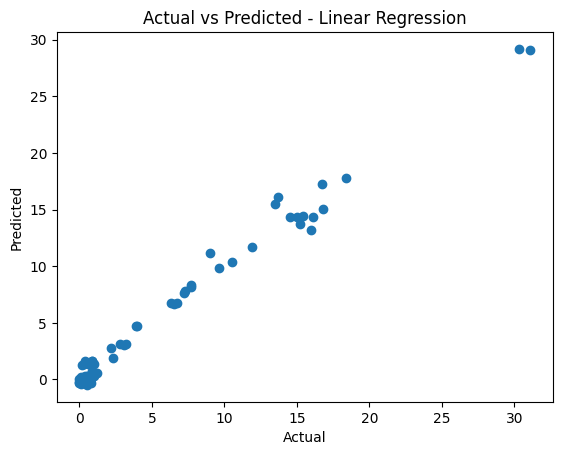

In [200]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train) 
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


    MAE: 1.216272633800629, 
    MSE: 2.6029377368132196, 
    R2: 0.9521029422229386


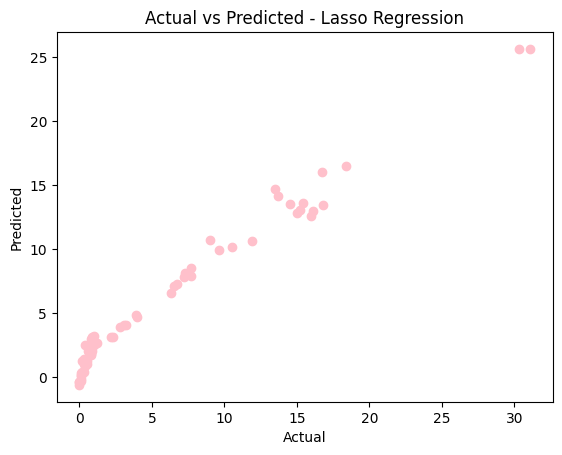

In [203]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train) 
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred, color='pink')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Lasso Regression")
plt.show()


    MAE: 0.7093542448703333, 
    MSE: 0.8868348464263109, 
    R2: 0.9836812155445575


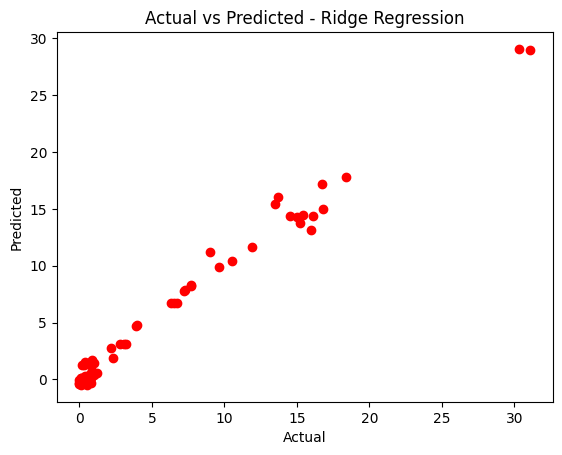

In [205]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train) 
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Ridge Regression")
plt.show()


    MAE: 1.749328647109016, 
    MSE: 5.569160502382824, 
    R2: 0.8975210207375391


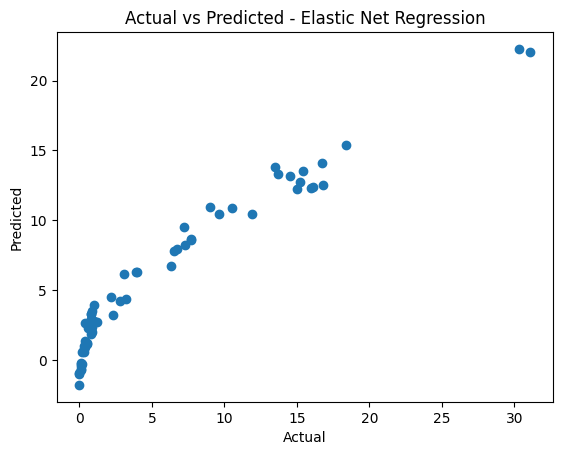

In [207]:
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled, y_train) 
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Elastic Net Regression")
plt.show()

### Cross Validation 

#### 1- Lasso Cross Validation

In [210]:
from sklearn.linear_model import LassoCV


    MAE: 0.7222308156305418, 
    MSE: 0.8972011670293636, 
    R2: 0.9834904632842026


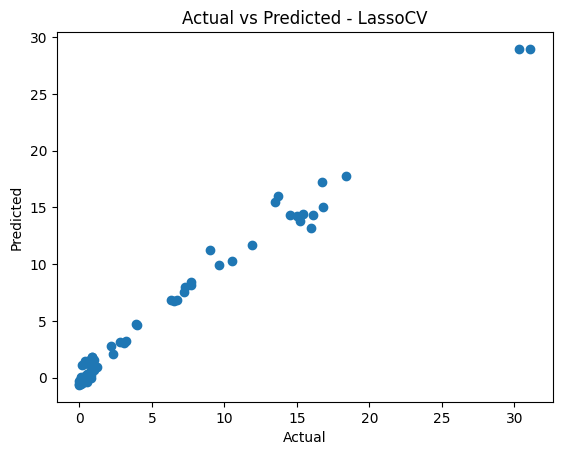

In [ ]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)
y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - LassoCV")
plt.show()

# Lasso Regression:%95
# LassoCV: %98

In [215]:
lasso_cv.alpha_  # Optimal alpha value found by cross-validation

np.float64(0.031548475118595085)

In [ ]:
lasso_cv.alphas_ # Array of alpha values tested during cross-validation

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

### 2- Ridge Cross Validation


    MAE: 0.7093542448703333, 
    MSE: 0.8868348464263109, 
    R2: 0.9836812155445575


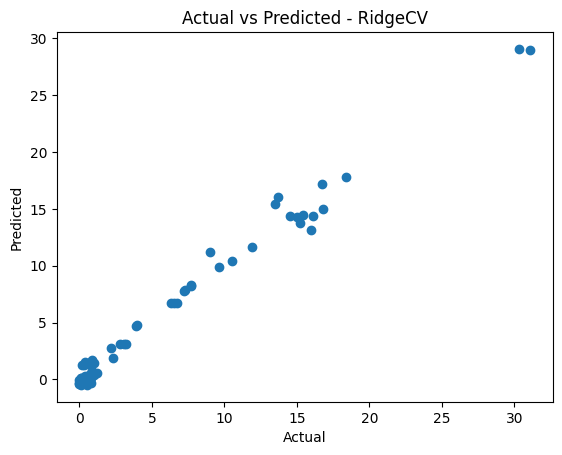

In [217]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred = ridge_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - RidgeCV")
plt.show()


### 3- ElasticNet Cross Validation


    MAE: 0.7354284604918176, 
    MSE: 0.9249125778630378, 
    R2: 0.9829805413498388


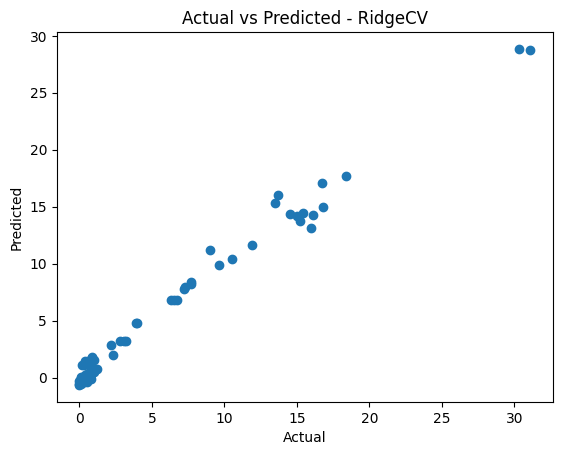

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticNet_cv = ElasticNetCV(cv=5)
elasticNet_cv.fit(X_train_scaled, y_train)
y_pred = elasticNet_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'''
    MAE: {mae}, 
    MSE: {mse}, 
    R2: {r2}''') 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - RidgeCV")
plt.show()

# ElasticNet Regression: %89
# ElasticNetCV: %98

In [220]:
elasticNet_cv.alpha_  # Optimal alpha value found by cross-validation

np.float64(0.025472347707234465)

In [222]:
elasticNet_cv.alphas_  # Array of alpha values tested during cross-validation

array([13.59382584, 12.67764748, 11.82321647, 11.02637125, 10.28323073,
        9.5901754 ,  8.94382967,  8.34104549,  7.77888694,  7.25461599,
        6.76567915,  6.30969502,  5.8844427 ,  5.48785095,  5.11798817,
        4.77305289,  4.4513651 ,  4.15135799,  3.87157036,  3.61063947,
        3.36729446,  3.14035008,  2.928701  ,  2.73131635,  2.54723477,
        2.37555967,  2.2154549 ,  2.06614066,  1.92688969,  1.79702377,
        1.67591039,  1.56295964,  1.45762139,  1.35938258,  1.26776475,
        1.18232165,  1.10263712,  1.02832307,  0.95901754,  0.89438297,
        0.83410455,  0.77788869,  0.7254616 ,  0.67656792,  0.6309695 ,
        0.58844427,  0.5487851 ,  0.51179882,  0.47730529,  0.44513651,
        0.4151358 ,  0.38715704,  0.36106395,  0.33672945,  0.31403501,
        0.2928701 ,  0.27313164,  0.25472348,  0.23755597,  0.22154549,
        0.20661407,  0.19268897,  0.17970238,  0.16759104,  0.15629596,
        0.14576214,  0.13593826,  0.12677647,  0.11823216,  0.11